In [10]:
import json
import matplotlib.pyplot as plt
from Football_Pitch import draw_football_pitch
import textwrap

%matplotlib inline

In [11]:
match_id = 267422

fin = open("../Data/Statsbomb_Data/events/" + str(match_id) + ".json", "r")
data = json.load(fin)
fin.close()

print("Example event: ")
data[0]

Example event: 


{'id': '76a7645d-aa32-4358-a685-03f4acc924e9',
 'index': 1,
 'period': 1,
 'timestamp': '00:00:00.000',
 'minute': 0,
 'second': 0,
 'type': {'id': 35, 'name': 'Starting XI'},
 'possession': 1,
 'possession_team': {'id': 217, 'name': 'Barcelona'},
 'play_pattern': {'id': 1, 'name': 'Regular Play'},
 'team': {'id': 217, 'name': 'Barcelona'},
 'duration': 0.0,
 'tactics': {'formation': 433,
  'lineup': [{'player': {'id': 4691, 'name': 'Claudio Andrés Bravo Muñoz'},
    'position': {'id': 1, 'name': 'Goalkeeper'},
    'jersey_number': 13},
   {'player': {'id': 6379, 'name': 'Sergi Roberto Carnicer'},
    'position': {'id': 2, 'name': 'Right Back'},
    'jersey_number': 20},
   {'player': {'id': 5506, 'name': 'Javier Alejandro Mascherano'},
    'position': {'id': 3, 'name': 'Right Center Back'},
    'jersey_number': 14},
   {'player': {'id': 6332, 'name': 'Thomas Vermaelen'},
    'position': {'id': 5, 'name': 'Left Center Back'},
    'jersey_number': 23},
   {'player': {'id': 5211, 'name':

In [12]:
passes = []
teams = [data[1]["possession_team"]["name"], data[1]["team"]["name"]]

for event in data:
    if "pass" in event:
        passes.append(
            [event["location"], event["pass"]["end_location"], event["team"]["name"]]
        )

print("There are", len(passes), "passes. Example pass:")
passes[4]

There are 956 passes. Example pass:


[[61.9, 33.3], [63.7, 9.2], 'Barcelona']

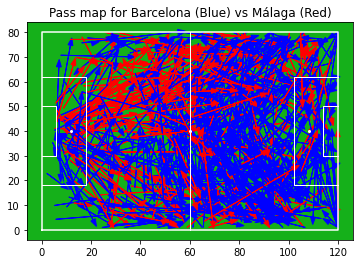

In [13]:
l, w = 120, 80
fig, ax = plt.subplots()

draw_football_pitch(fig, ax, l, w)
colors = {teams[0]: "blue", teams[1]: "red"}

for start, end, team in passes:
    ax.arrow(
        start[0],
        start[1],
        end[0] - start[0],
        end[1] - start[1],
        color=colors[team],
        length_includes_head=True,
        head_width=2,
    )


plt.axis("scaled")
title = "Pass map for " + teams[0] + " (Blue) vs " + teams[1] + " (Red)"
plt.title(textwrap.fill(title, 60))
plt.show()